# Lab 7-3 결정 트리 모델로 과대 적합 조정

## 라이브러리 import

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## 데이터 준비

In [3]:
df_wine = pd.read_csv('../data/wine.csv')
df_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
df_wine['class'].unique()
## 0: red wine, 1: white wine

array([0., 1.])

In [5]:
data = df_wine[['alcohol','sugar','pH']].to_numpy()
target = df_wine['class'].to_numpy()

In [6]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

## 정규화

In [7]:
ss = StandardScaler()

In [8]:
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 모델 생성, 학습, 평가

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


## 노드 확인

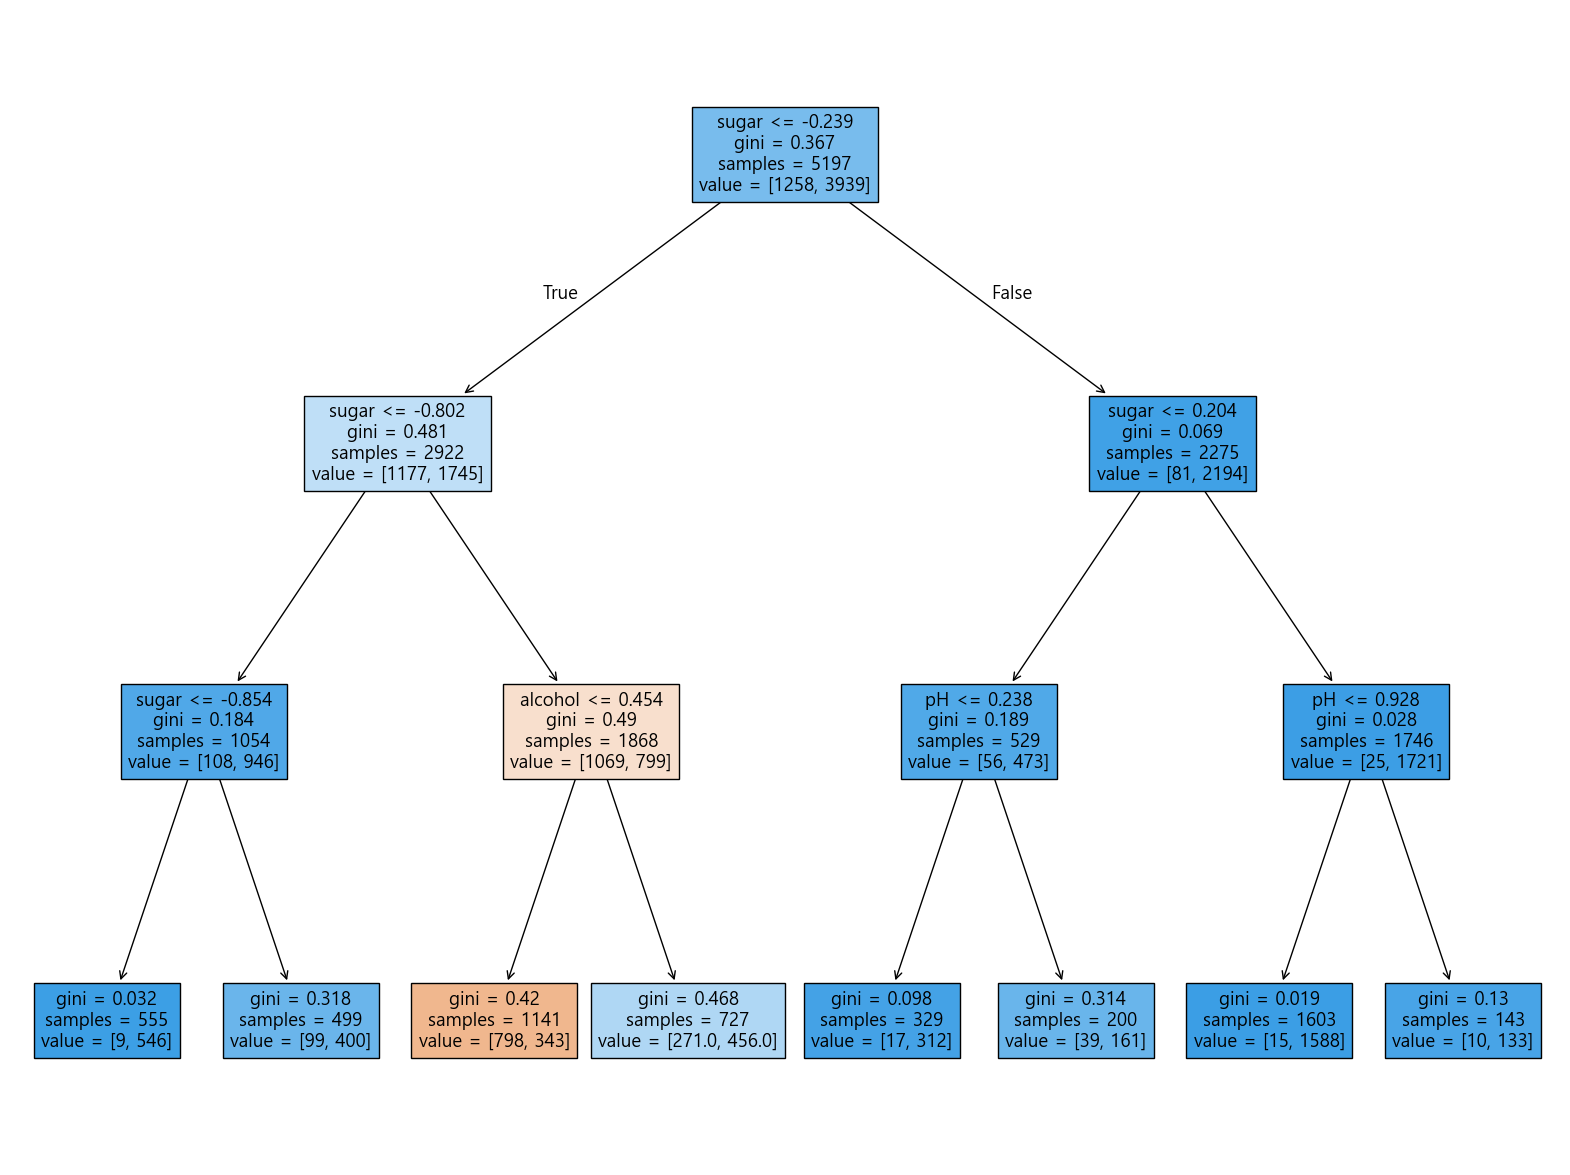

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

## 정규화되지 않은 데이터로 학습

In [16]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


### 정규화되지 않은 데이터로 학습한 결정 트리 분기 확인

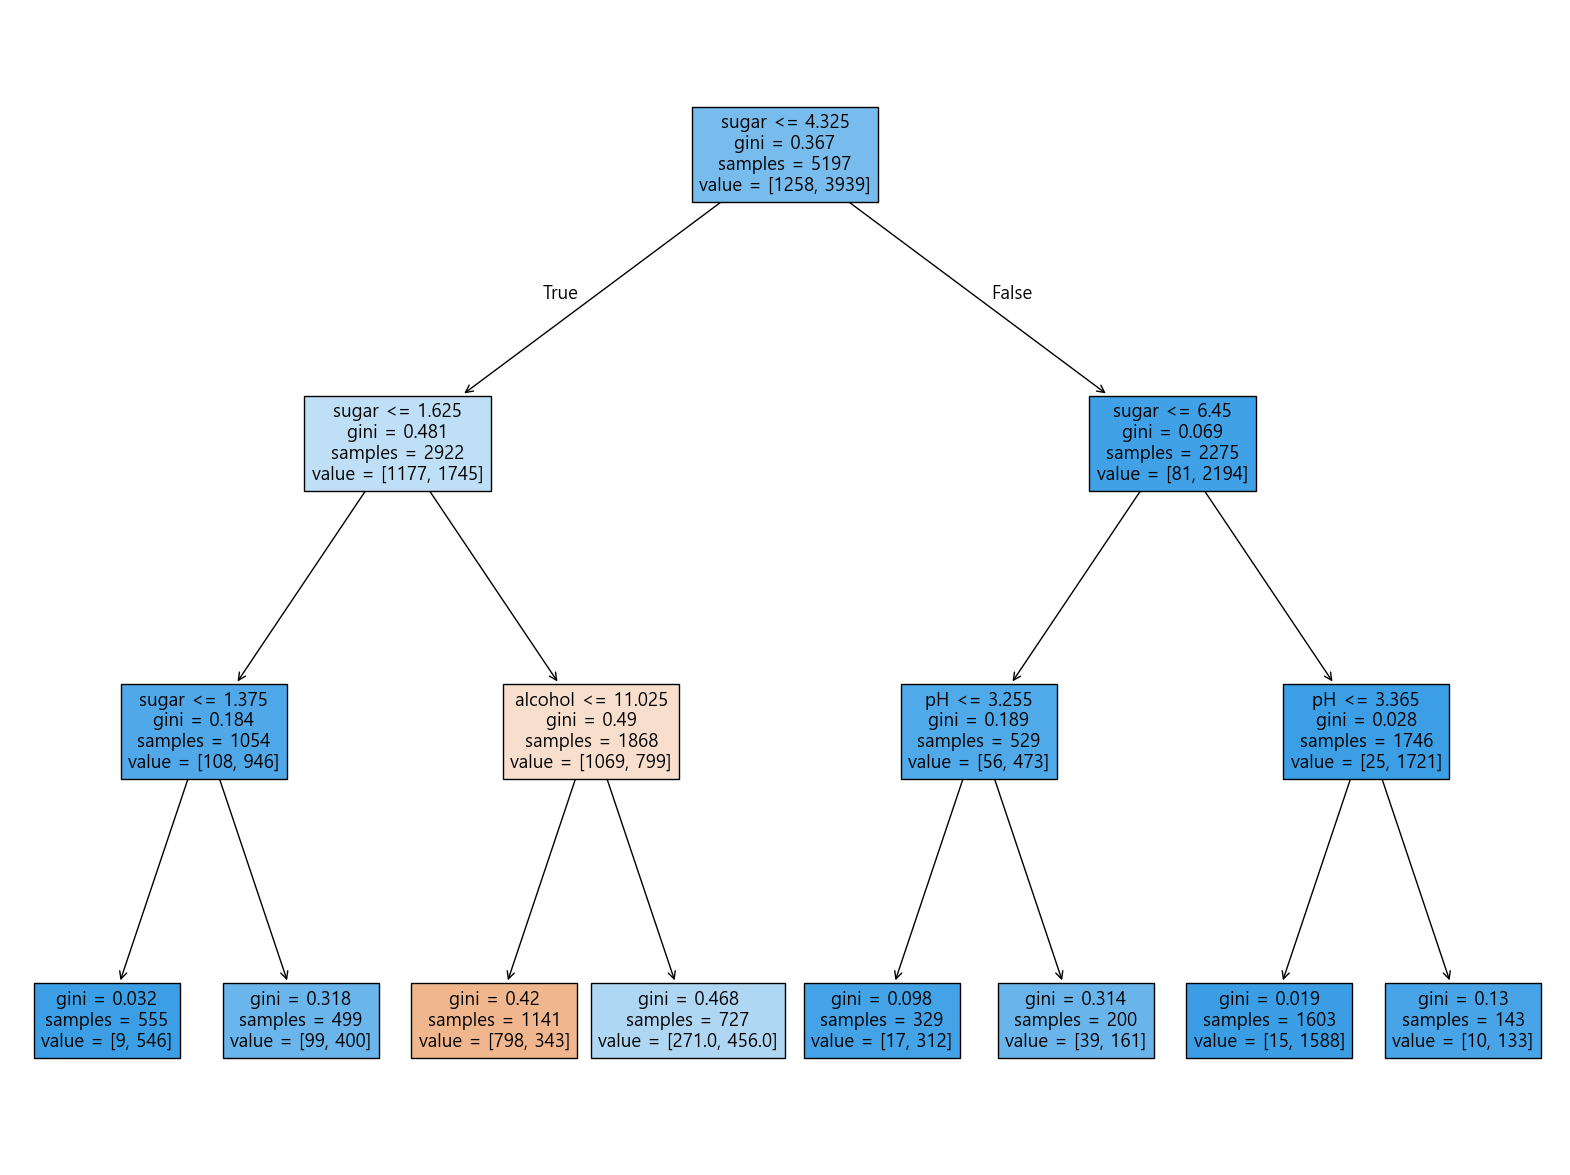

In [19]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

## 모델의 특성 중요도 확인

In [38]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


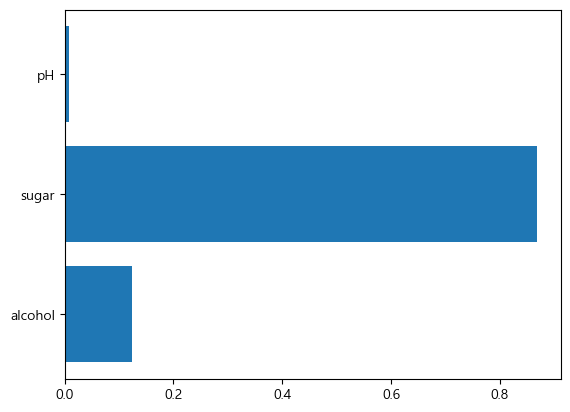

In [37]:
plt.barh(df_wine.columns[:3], dt.feature_importances_)
plt.show()